In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.transforms
import numpy as np
import pandas as pd
import seaborn as sns

/Users/romain/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Global parameter to build seaborn boxplot

In [2]:
json_data_from_lcs_1 = 'data/acs2.json'
lcs_1_name = "ACS2"

json_data_from_lcs_2 = 'data/bacs-2.json'
lcs_2_name = "BACS-2"

figure_size = (20, 10)

nb_of_environments = 24

axe_label_fontsize = '24'
tick_label_fontsize = '20'
legend_fontsize = '20'

### Reading json files and preparing data

In [3]:
with open(json_data_from_lcs_1) as json_file_1:
    raw_data_from_lcs_1 = json.load(json_file_1)
    
with open(json_data_from_lcs_2) as json_file_2:
    raw_data_from_lcs_2 = json.load(json_file_2)
    
cleaned_data = {'LCS':[], 'Maze':[], 'Distance to exit':[]}
raw_data = [raw_data_from_lcs_1,raw_data_from_lcs_2]
lcs_name = [lcs_1_name, lcs_2_name]

for i in range(len(raw_data)):
    for item in raw_data[i]:
        if 'time' not in item.keys():
            for value in item['avg_exploit_rl_list']:
                cleaned_data['LCS'].append(lcs_name[i])
                cleaned_data['Maze'].append(item['maze'])
                cleaned_data['Distance to exit'].append(value)
                
pandas_data = pd.DataFrame(cleaned_data)

### Plotting boxplots with seaborn

In [4]:
rc={
    'axes.labelsize':axe_label_fontsize,
    'xtick.labelsize':tick_label_fontsize,
    'ytick.labelsize':tick_label_fontsize
}
sns.set(context='notebook', style='ticks', rc=rc)

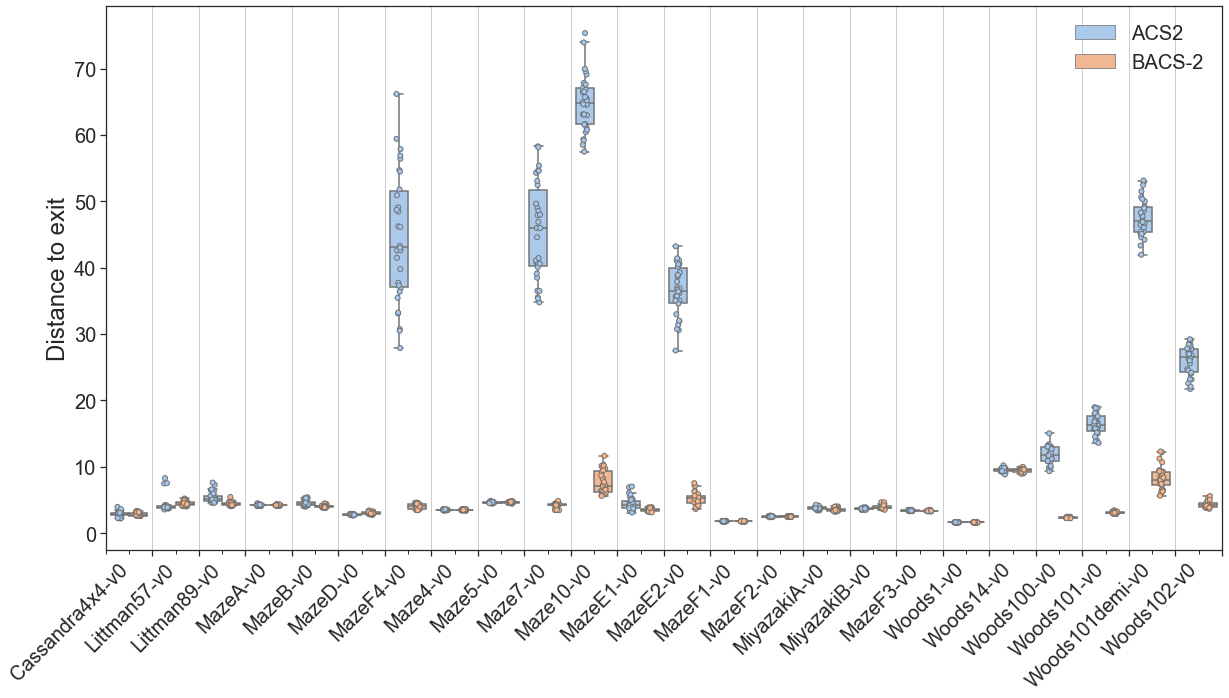

In [5]:
fig, ax = plt.subplots(figsize=figure_size)
# Build the main figure
sns.stripplot(
    x = 'Maze',
    y = 'Distance to exit',
    hue = 'LCS',
    data = pandas_data,
    edgecolor='gray',
    jitter=True,
    linewidth = 1,
    dodge=True,
    palette='pastel',
    ax = ax
)
sns.boxplot(
    x = 'Maze',
    y = 'Distance to exit',
    hue = 'LCS',
    data = pandas_data,
    fliersize=0,
    palette='pastel',
    ax = ax
)

# Set up x tick labels and x label correctly
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.xlabel('')

# Hide the horizontal gridlines
ax.yaxis.grid(False)

# Show the vertical gridlines
ax.xaxis.grid(True)

# Shift major ticks to create column for each maze
plt.xticks(np.arange(nb_of_environments)+0.5)

# Set up minor ticks and align label of major ticks on minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

dx = (500./nb_of_environments)/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() - offset)

# Set up legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], frameon=False, loc='upper right', fontsize=legend_fontsize)